In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data = pd.read_csv("device_data.csv")

In [38]:
data

,id,date,h_humidity,h_temperature,a_humidity,a_temperature,a_voc,w_temperature,w_alarm
0,17,2024-04-10 10:50:13.836067+00:00,39.0,22.9,38.3,22.6,2239,19.8,True
1,33,2024-04-10 11:10:14.782679+00:00,39.0,22.8,38.5,22.5,89,20.1,True
2,51,2024-04-03 15:16:30.862480+00:00,39.0,22.8,44.2,22.5,9585,25.2,True
3,67,2024-04-03 15:23:01.147618+00:00,39.0,25.8,35.6,25.0,791,22.1,True
4,83,2024-04-03 15:42:55.101740+00:00,34.0,25.7,33.7,25.0,0,19.2,True
...,...,...,...,...,...,...,...,...,...
4768,77936,2024-05-25 16:04:57.841087+00:00,45.0,25.4,44.6,24.9,95,21.4,False
4769,77956,2024-05-25 16:33:55.436752+00:00,45.0,25.5,44.5,24.9,84,21.4,False
4770,77973,2024-05-25 16:55:00.105988+00:00,45.0,25.5,44.4,24.9,80,21.4,False
4771,77993,2024-05-25 17:24:57.867463+00:00,45.0,25.5,44.2,24.9,85,21.4,False


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4773 non-null   int64  
 1   date           4773 non-null   object 
 2   h_humidity     4773 non-null   float64
 3   h_temperature  4773 non-null   float64
 4   a_humidity     4773 non-null   float64
 5   a_temperature  4773 non-null   float64
 6   a_voc          4773 non-null   int64  
 7   w_temperature  4773 non-null   float64
 8   w_alarm        4773 non-null   bool   
dtypes: bool(1), float64(5), int64(2), object(1)
memory usage: 303.1+ KB


In [40]:
data.dropna(inplace=True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4773 non-null   int64  
 1   date           4773 non-null   object 
 2   h_humidity     4773 non-null   float64
 3   h_temperature  4773 non-null   float64
 4   a_humidity     4773 non-null   float64
 5   a_temperature  4773 non-null   float64
 6   a_voc          4773 non-null   int64  
 7   w_temperature  4773 non-null   float64
 8   w_alarm        4773 non-null   bool   
dtypes: bool(1), float64(5), int64(2), object(1)
memory usage: 303.1+ KB


In [42]:
from sklearn.model_selection import train_test_split

x = data['date']
# split the date into year, month, day
x = pd.to_datetime(x)
data['year'] = x.dt.year
data['month'] = x.dt.month
data['day'] = x.dt.day
data['hour'] = x.dt.hour
data=data.drop('date', axis=1)

# x have year month day
x = data[['year', 'month', 'day', 'hour']]
y = data.drop(['year', 'month', 'day', 'hour', 'id'], axis=1)

In [43]:
# from datetime import datetime

# x_formatted = []

# for idx, value in x.items():
#     formatted_date = datetime.strptime(value, "%Y-%m-%d %H:%M:%S.%f%z").strftime("%Y-%m-%d %H:%M:%S")
#     formatted_date = formatted_date.replace("-", "").replace(":", "").replace(" ", "")
#     x_formatted.append(formatted_date)

# x = pd.Series(x_formatted, name="date")
# x

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [45]:
train_data = y_train.join(x_train)

test_data = y_test.join(x_test)
# train_data.date.value_counts()

array([[<Axes: title={'center': 'h_humidity'}>,
        <Axes: title={'center': 'h_temperature'}>,
        <Axes: title={'center': 'a_humidity'}>],
       [<Axes: title={'center': 'a_temperature'}>,
        <Axes: title={'center': 'a_voc'}>,
        <Axes: title={'center': 'w_temperature'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

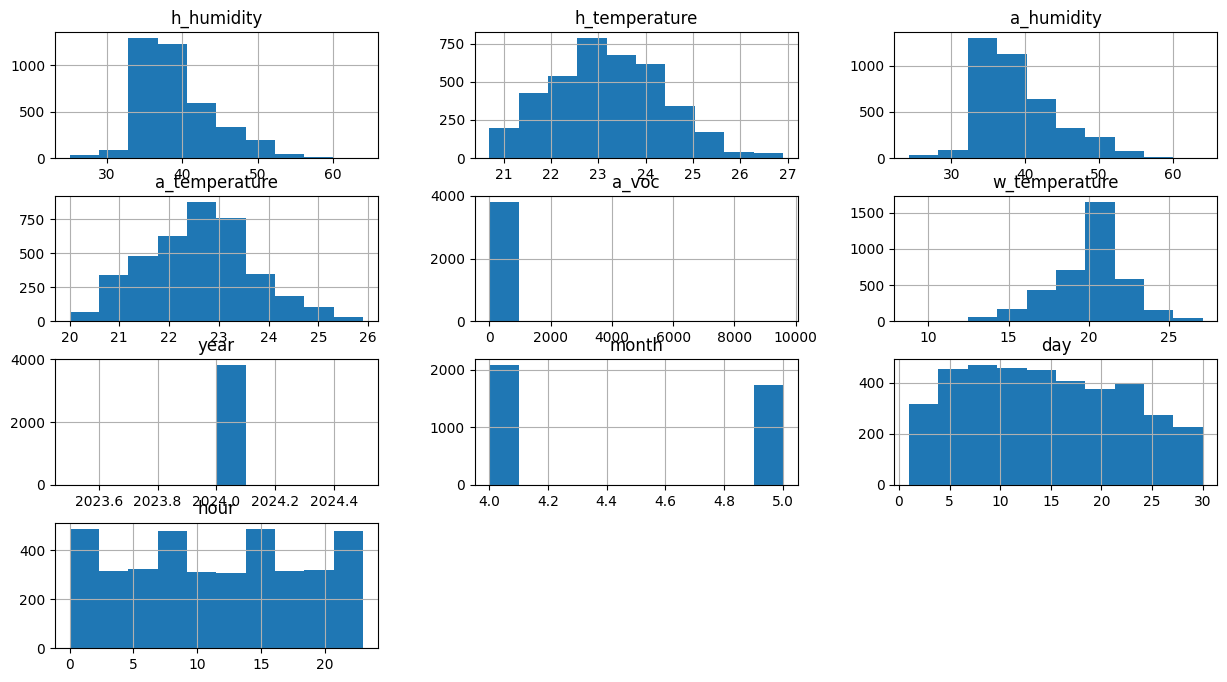

In [46]:
# train_data = train_data[~train_data['date'].isnull()]
# train_data['date'] = train_data['date'].astype(np.int64)

# test_data = test_data[~test_data['date'].isnull()]
# test_data['date'] = test_data['date'].astype(np.int64)

train_data.hist(figsize=(15, 8))

<Axes: >

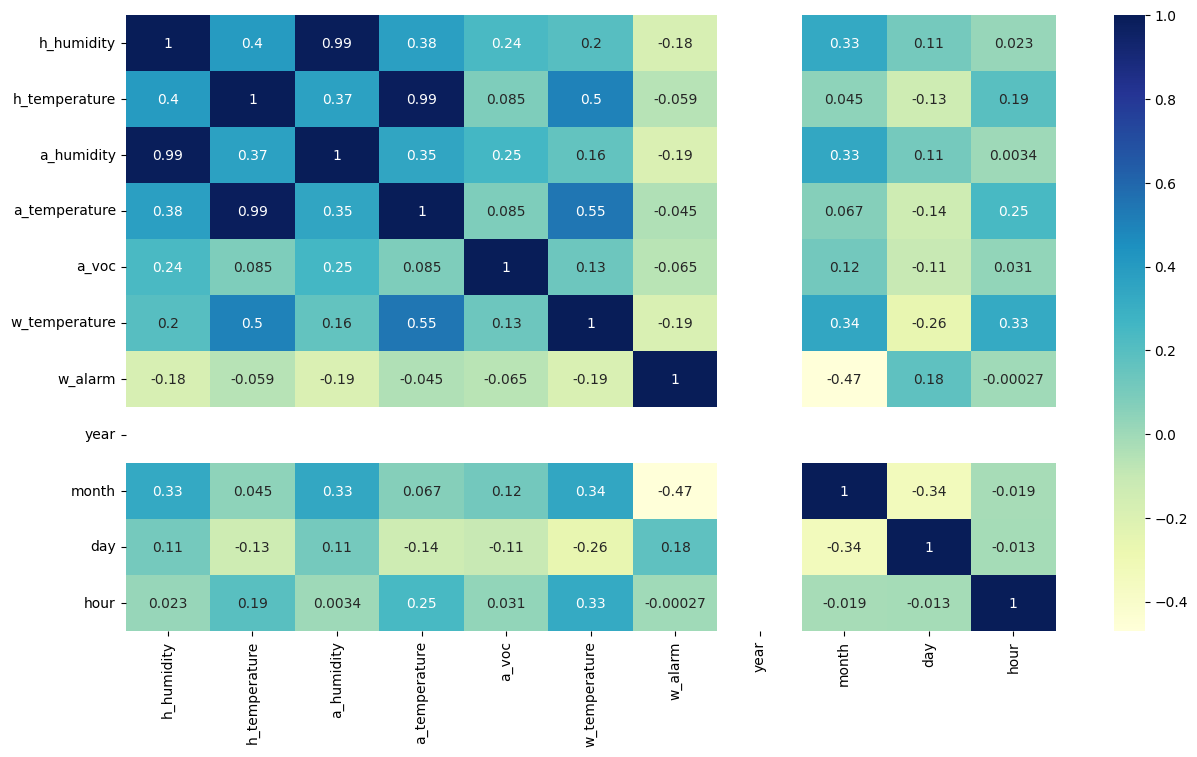

In [47]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [48]:
# train_data['a_voc'] = np.log(train_data['a_voc'] + 1)
# test_data['a_voc'] = np.log(test_data['a_voc'] + 1)

array([[<Axes: title={'center': 'h_humidity'}>,
        <Axes: title={'center': 'h_temperature'}>,
        <Axes: title={'center': 'a_humidity'}>],
       [<Axes: title={'center': 'a_temperature'}>,
        <Axes: title={'center': 'a_voc'}>,
        <Axes: title={'center': 'w_temperature'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

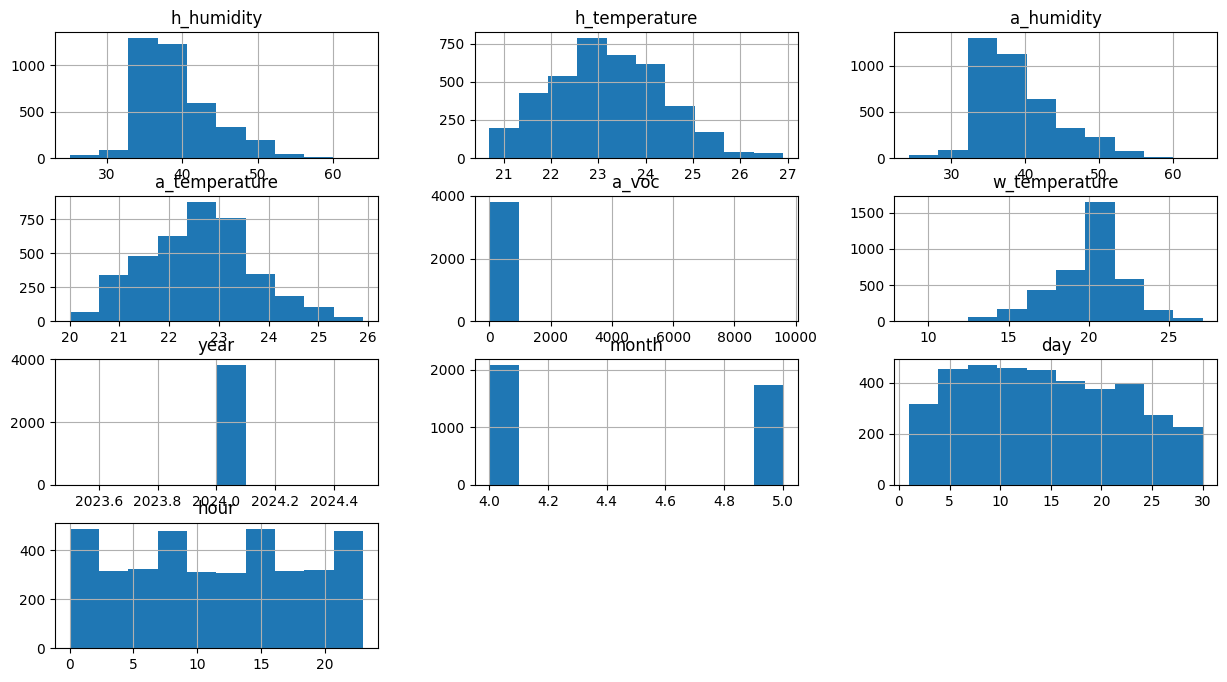

In [49]:
train_data.hist(figsize=(15,8))

In [50]:
train_data = train_data.join(pd.get_dummies(train_data.w_alarm)).drop(['w_alarm'], axis=1)
test_data = test_data.join(pd.get_dummies(test_data.w_alarm)).drop(['w_alarm'], axis=1)

In [51]:
test_data

,h_humidity,h_temperature,a_humidity,a_temperature,a_voc,w_temperature,year,month,day,hour,False,True
357,36.0,22.7,35.7,22.1,55,17.3,2024,4,7,7,False,True
4700,46.0,25.0,45.5,24.3,59,21.4,2024,5,24,16,True,False
3302,38.0,23.1,37.8,22.6,117,19.8,2024,5,7,3,True,False
2960,35.0,22.3,35.0,21.8,81,21.6,2024,5,3,11,True,False
3293,38.0,23.2,37.7,22.7,122,20.6,2024,5,7,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1041,37.0,23.6,36.4,23.0,18,19.7,2024,4,14,10,False,True
16,34.0,24.7,33.8,24.0,66,19.4,2024,4,3,18,True,False
4433,51.0,25.0,51.1,24.3,63,21.4,2024,5,20,18,True,False
4196,33.0,23.0,33.3,22.6,53,21.4,2024,5,16,22,True,False


<Axes: >

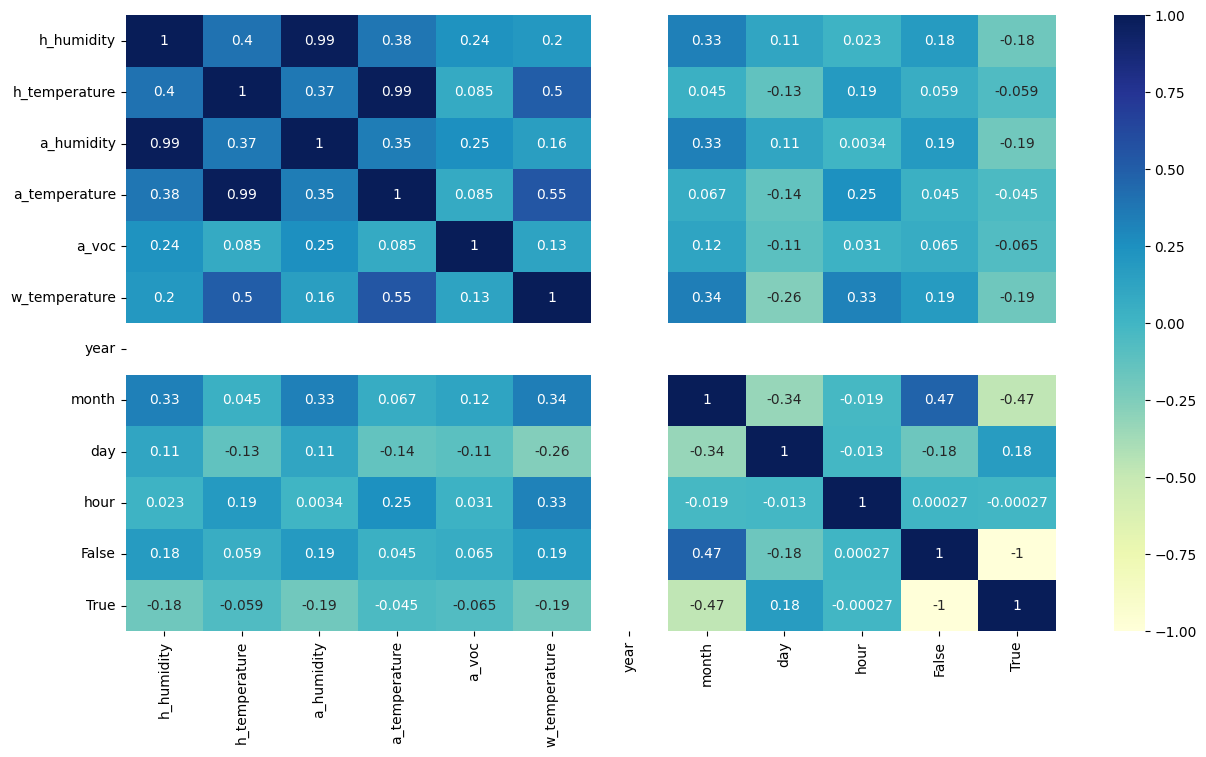

In [52]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [53]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data[['year', 'month', 'day', 'hour']], train_data.drop(['year', 'month', 'day', 'hour'], axis = 1)
x_test, y_test = test_data[['year', 'month', 'day', 'hour']], test_data.drop(['year', 'month', 'day', 'hour'], axis = 1)

reg = LinearRegression()
x_train, y_train

(      year  month  day  hour
 3859  2024      5   13     0
 3262  2024      5    6    17
 2419  2024      4   28    19
 651   2024      4   10     9
 4019  2024      5   14    16
 ...    ...    ...  ...   ...
 4269  2024      5   17    23
 3788  2024      5   12     6
 2545  2024      4   30     3
 3007  2024      5    4     0
 407   2024      4    7    20
 
 [3818 rows x 4 columns],
       h_humidity  h_temperature  a_humidity  a_temperature  a_voc  \
 3859        42.0           23.1        42.1           22.5    163   
 3262        37.0           23.4        36.8           23.0    112   
 2419        34.0           21.7        33.1           21.5     30   
 651         45.0           23.9        45.0           23.2    191   
 4019        34.0           23.8        33.5           23.2     46   
 ...          ...            ...         ...            ...    ...   
 4269        39.0           23.5        39.4           22.8    198   
 3788        42.0           22.9        42.4        

In [54]:
# convert x_train from a Series to a DataFrame with one column
# x_train = x_train.to_frame()

reg.fit(x_train, y_train)

LinearRegression()

In [55]:
reg.score(x_test, y_test)

0.14055406626311048

In [56]:
import joblib

joblib.dump(reg, 'model.pkl')

['model.pkl']

In [57]:
model = joblib.load('model.pkl')
# x_test.to_frame()
model.predict([[2024, 6, 18, 4]])
# h_humidity	h_temperature	a_humidity	a_temperature	a_voc	w_temperature	date

C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[ 46.04077367,  22.9051684 ,  46.5897682 ,  22.36374982,
        158.28636989,  21.33420017,   1.24301076,  -0.24301076]])